# Predictive Modeling and Analysis of Air Quality in Mongolia

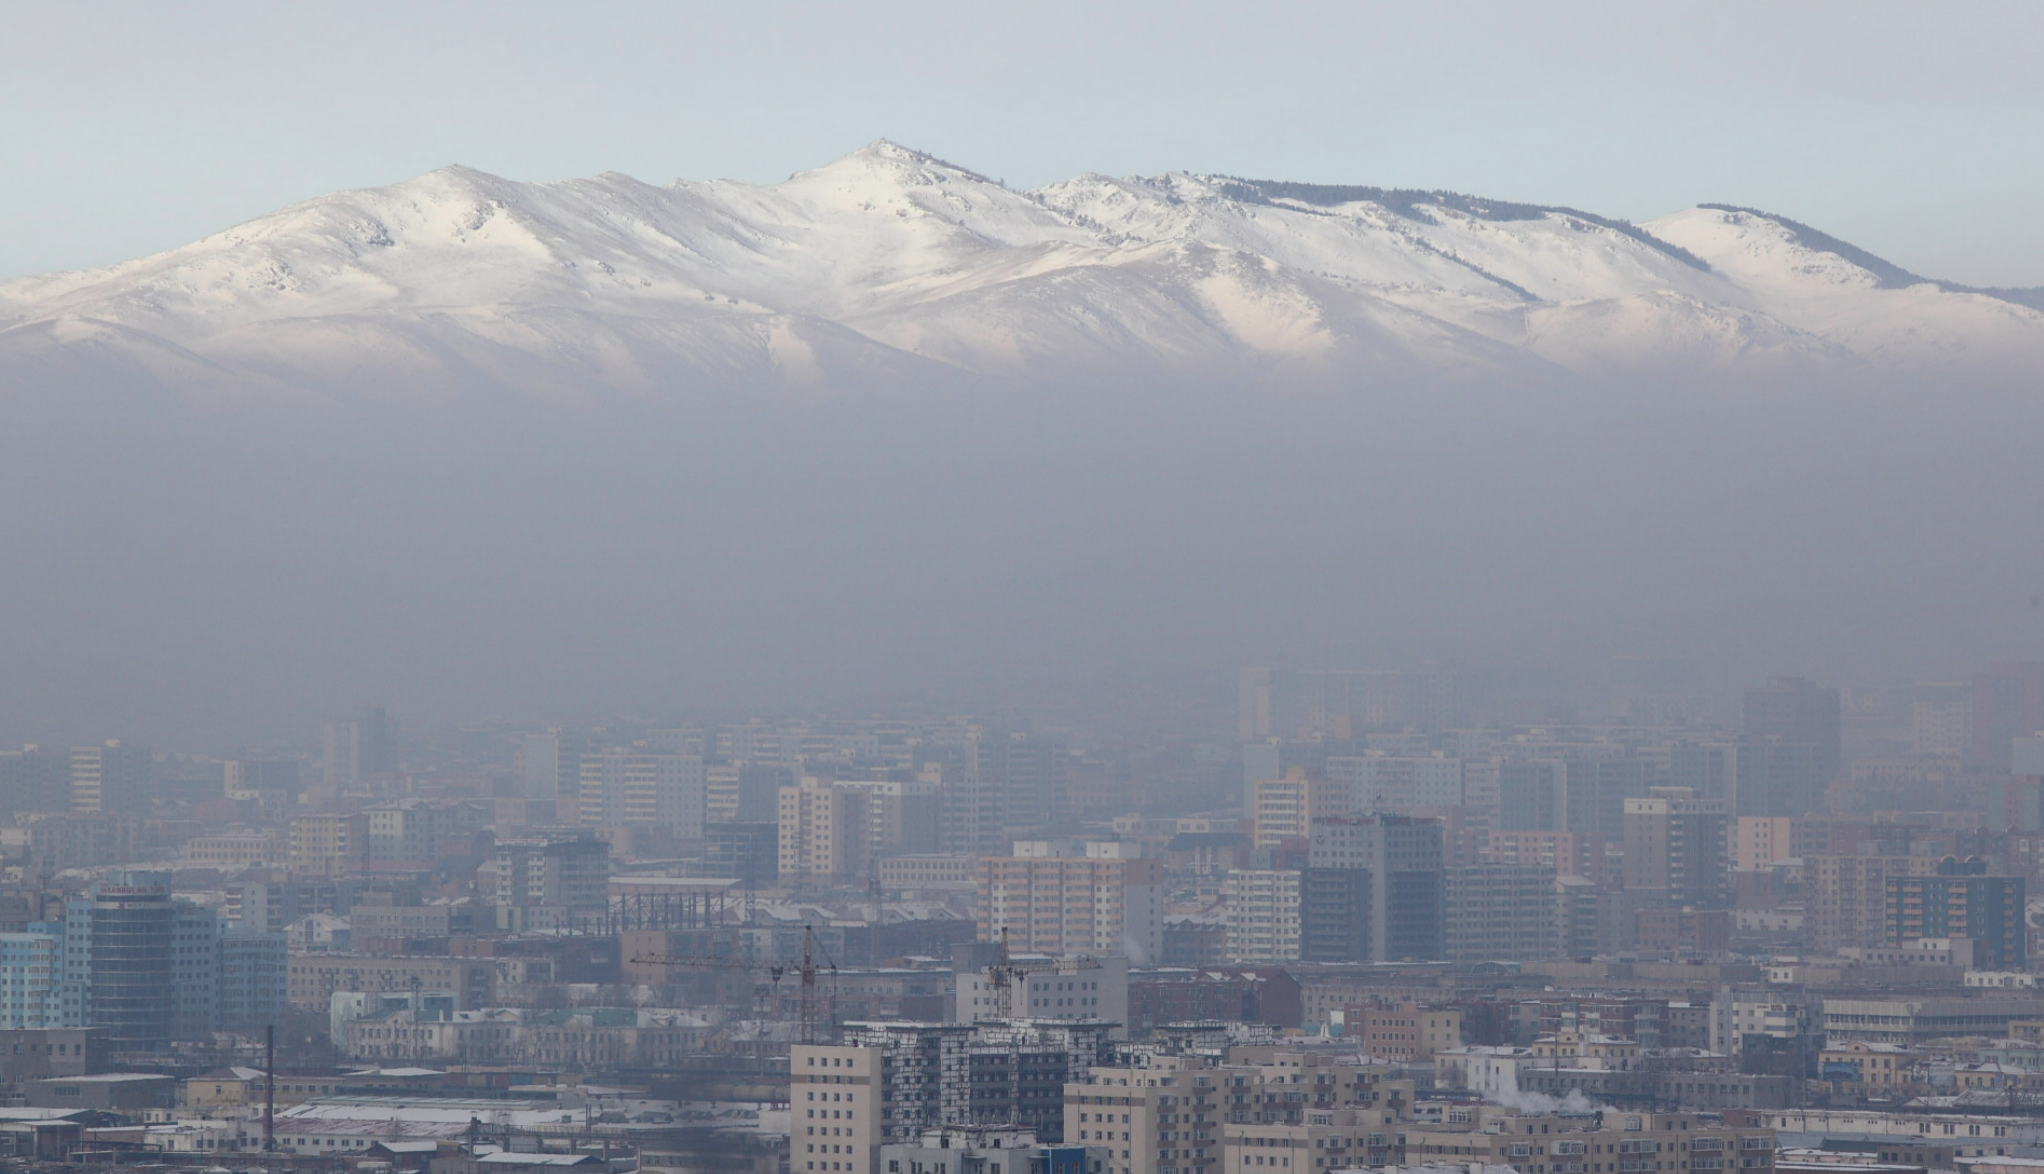

The environment and public health are greatly impacted by air quality, particularly in metropolitan areas where pollution levels are frequently high. Air pollution is a serious problem in Mongolia, especially in Ulaanbaatar. PM2.5, or fine particulate matter, is the main pollutant of concern since it can enter the respiratory system deeply and provide serious health hazards. This project's goal is to examine Ulaanbaatar's 2023 air pollution data, with a particular emphasis on PM2.5 levels.

The overarching objective is to build a machine learning–based system capable of forecasting air quality levels, identifying seasonal trends, and recommending actionable steps to reduce health risks.

The project has been completed in multiple stages over the semester. In this final phase, the goal is to consolidate all previous work, enhance the models through tuning and validation, and deliver the findings through a structured report, poster, and presentation. The following specific goals will be pursued:

1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Machine Learning Model Implementation
5. Model Comparison and Selection
6. Insights and Public Health Recommendations

### 1. Understanding and Cleaning the Data

In [7]:
#pip install numpy==1.26.4

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [213]:
df=pd.read_csv("Ulaanbaatar_PM2.5_2023_YTD.csv")

In [214]:
df.head()

Site          Parameter            Date (LT)  Year  Month  Day  \
0  Ulaanbaatar  PM2.5 - Principal  2023-01-01 01:00 AM  2023      1    1   
1  Ulaanbaatar  PM2.5 - Principal  2023-01-01 02:00 AM  2023      1    1   
2  Ulaanbaatar  PM2.5 - Principal  2023-01-01 03:00 AM  2023      1    1   
3  Ulaanbaatar  PM2.5 - Principal  2023-01-01 04:00 AM  2023      1    1   
4  Ulaanbaatar  PM2.5 - Principal  2023-01-01 05:00 AM  2023      1    1   

   Hour  NowCast Conc.  AQI AQI Category  Raw Conc. Conc. Unit Duration  \
0     1          540.3  526    Hazardous      620.0      UG/M3     1 Hr   
1     2          596.2  563    Hazardous      652.0      UG/M3     1 Hr   
2     3          554.1  535    Hazardous      512.0      UG/M3     1 Hr   
3     4          415.6  444    Hazardous      277.0      UG/M3     1 Hr   
4     5          276.8  327    Hazardous      138.0      UG/M3     1 Hr   

  QC Name  
0   Valid  
1   Valid  
2   Valid  
3   Valid  
4   Valid

In [215]:
df.describe()

Year        Month          Day         Hour  NowCast Conc.  \
count  7373.000000  7373.000000  7373.000000  7373.000000    7373.000000   
mean   2023.000136     6.051946    16.186084    11.504408      51.001058   
std       0.011646     3.455458     9.019502     6.931718      84.273509   
min    2023.000000     1.000000     1.000000     0.000000    -999.000000   
25%    2023.000000     3.000000     8.000000     5.000000       9.300000   
50%    2023.000000     6.000000    16.000000    12.000000      19.400000   
75%    2023.000000     8.000000    24.000000    18.000000      63.400000   
max    2024.000000    12.000000    31.000000    23.000000     596.200000   

               AQI    Raw Conc.  
count  7373.000000  7373.000000  
mean     98.336905    49.834396  
std      93.242200    99.220532  
min    -999.000000  -999.000000  
25%      39.000000     8.000000  
50%      66.000000    18.000000  
75%     155.000000    55.000000  
max     563.000000   985.000000

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           7373 non-null   object 
 1   Parameter      7373 non-null   object 
 2   Date (LT)      7373 non-null   object 
 3   Year           7373 non-null   int64  
 4   Month          7373 non-null   int64  
 5   Day            7373 non-null   int64  
 6   Hour           7373 non-null   int64  
 7   NowCast Conc.  7373 non-null   float64
 8   AQI            7373 non-null   int64  
 9   AQI Category   7363 non-null   object 
 10  Raw Conc.      7373 non-null   float64
 11  Conc. Unit     7373 non-null   object 
 12  Duration       7373 non-null   object 
 13  QC Name        7373 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 806.6+ KB


In [236]:
df.shape

(7373, 14)

In [238]:
df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

In [240]:
df.isnull().sum()

Site              0
Parameter         0
Date (LT)         0
Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI               0
AQI Category     10
Raw Conc.         0
Conc. Unit        0
Duration          0
QC Name           0
dtype: int64

In [242]:
df['AQI Category'].unique()

array(['Hazardous', 'Very Unhealthy', 'Unhealthy',
       'Unhealthy for Sensitive Groups', 'Moderate', nan, 'Good'],
      dtype=object)

In [244]:
#Fill missing values with the mode (most frequent category)
df['AQI Category'] = df['AQI Category'].fillna(df['AQI Category'].mode()[0])
# Verify the missing values again
missing_values_after = df.isnull().sum()
print(missing_values_after)

Site             0
Parameter        0
Date (LT)        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64


In [246]:
df.replace(-999, np.nan, inplace=True)
df.dropna(subset=['NowCast Conc.', 'AQI', 'Raw Conc.'], inplace=True)

In [248]:
df.describe()

Year        Month          Day         Hour  NowCast Conc.  \
count  7344.000000  7344.000000  7344.000000  7344.000000    7344.000000   
mean   2023.000136     6.046296    16.196759    11.502996      52.468423   
std       0.011669     3.454067     9.013319     6.934136      74.978452   
min    2023.000000     1.000000     1.000000     0.000000       0.000000   
25%    2023.000000     3.000000     8.000000     5.000000       9.300000   
50%    2023.000000     6.000000    16.000000    11.000000      19.400000   
75%    2023.000000     8.000000    24.000000    18.000000      63.400000   
max    2024.000000    12.000000    31.000000    23.000000     596.200000   

               AQI    Raw Conc.  
count  7344.000000  7344.000000  
mean     99.869962    52.589325  
std      84.117819    83.830318  
min       0.000000    -2.000000  
25%      39.000000     9.000000  
50%      66.000000    18.000000  
75%     155.000000    55.250000  
max     563.000000   985.000000

After data cleaning, the final dataset contained 7,344 valid hourly observations from Ulaanbaatar for the year 2023. Key pollutants like PM2.5 were measured using Raw Conc., with AQI calculated accordingly.

The average AQI was 99.8, placing Ulaanbaatar's air quality frequently in the “Unhealthy for Sensitive Groups” range. Maximum AQI reached 563, representing extremely hazardous air conditions.

PM2.5 concentration (Raw Conc.) ranged from -2 (rounded to 0) to 985 μg/m³, with a mean of 52.6. The lowest levels were observed during warmer months, while peaks aligned with the cold season — likely due to heating-related emissions.

This statistical overview confirmed the high variability and severity of air pollution, supporting the need for time series forecasting and machine learning-based predictions.

In [251]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

Site            0
Parameter       0
Date (LT)       0
AQI Category    0
Conc. Unit      0
Duration        0
QC Name         0
dtype: int64

In [253]:
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
df['hour_of_day'] = df['Date (LT)'].dt.hour
df['day_of_week'] = df['Date (LT)'].dt.dayofweek
df['month'] = df['Date (LT)'].dt.month

In [255]:
df.head()

Site          Parameter           Date (LT)  Year  Month  Day  Hour  \
0  Ulaanbaatar  PM2.5 - Principal 2023-01-01 01:00:00  2023      1    1     1   
1  Ulaanbaatar  PM2.5 - Principal 2023-01-01 02:00:00  2023      1    1     2   
2  Ulaanbaatar  PM2.5 - Principal 2023-01-01 03:00:00  2023      1    1     3   
3  Ulaanbaatar  PM2.5 - Principal 2023-01-01 04:00:00  2023      1    1     4   
4  Ulaanbaatar  PM2.5 - Principal 2023-01-01 05:00:00  2023      1    1     5   

   NowCast Conc.    AQI AQI Category  Raw Conc. Conc. Unit Duration QC Name  \
0          540.3  526.0    Hazardous      620.0      UG/M3     1 Hr   Valid   
1          596.2  563.0    Hazardous      652.0      UG/M3     1 Hr   Valid   
2          554.1  535.0    Hazardous      512.0      UG/M3     1 Hr   Valid   
3          415.6  444.0    Hazardous      277.0      UG/M3     1 Hr   Valid   
4          276.8  327.0    Hazardous      138.0      UG/M3     1 Hr   Valid   

   hour_of_day  day_of_week  month  
0            1            6      1  
1            2            6      1  
2            3            6      1  
3            4            6      1  
4            5            6      1

### 2. Exploratory Data Analysis (EDA)

In [258]:
sns.set(style="whitegrid")

# Convert date 
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
df.set_index('Date (LT)', inplace=True)

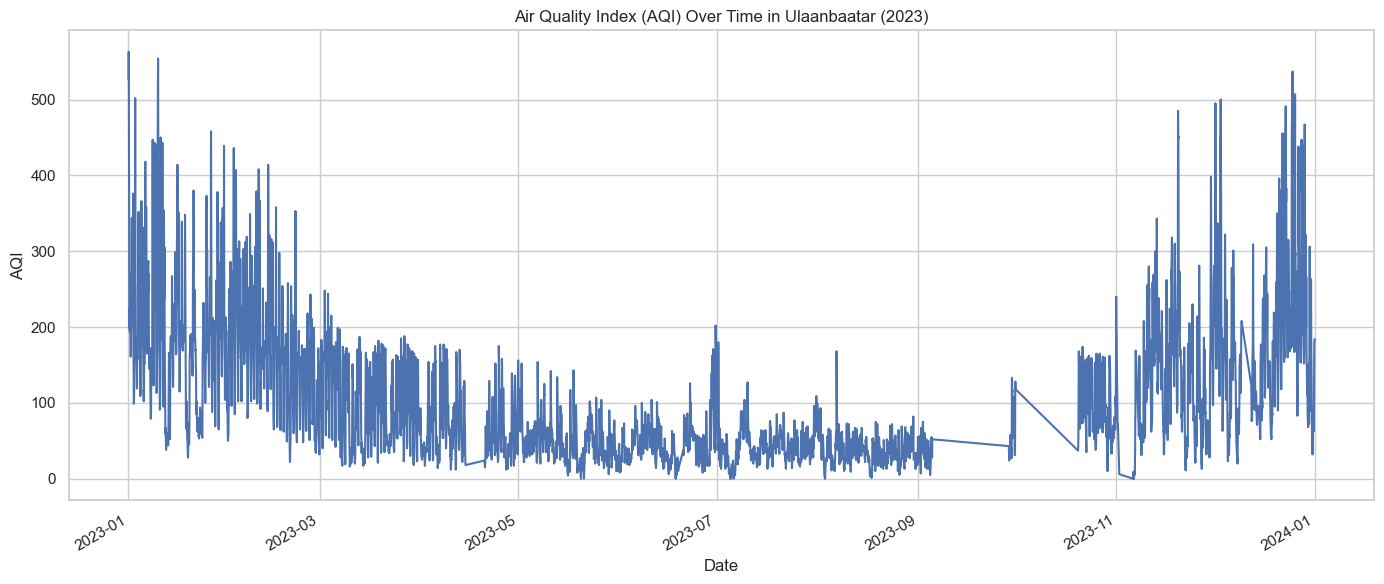

In [260]:
plt.figure(figsize=(14,6))
df['AQI'].plot()
plt.title('Air Quality Index (AQI) Over Time in Ulaanbaatar (2023)')
plt.ylabel('AQI')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

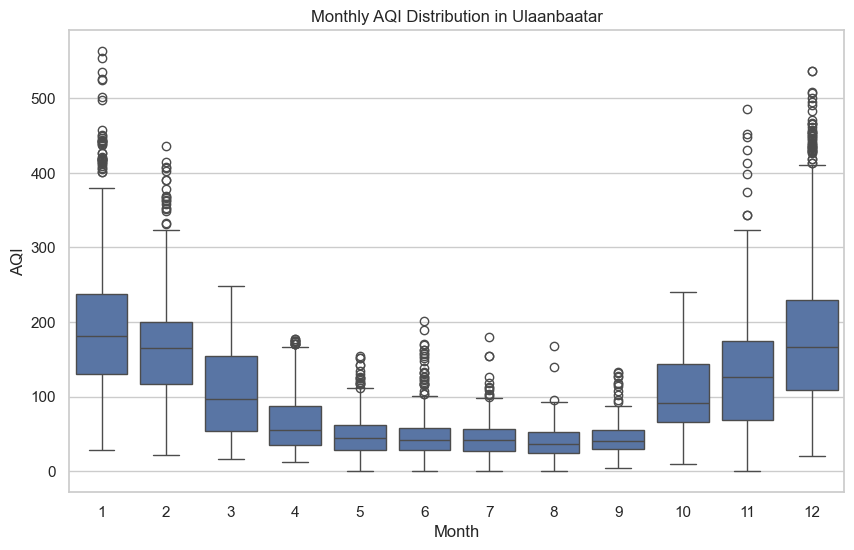

In [262]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Month', y='AQI')
plt.title('Monthly AQI Distribution in Ulaanbaatar')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()

Winter months ( January, December) likely show higher AQI values due to coal heating.

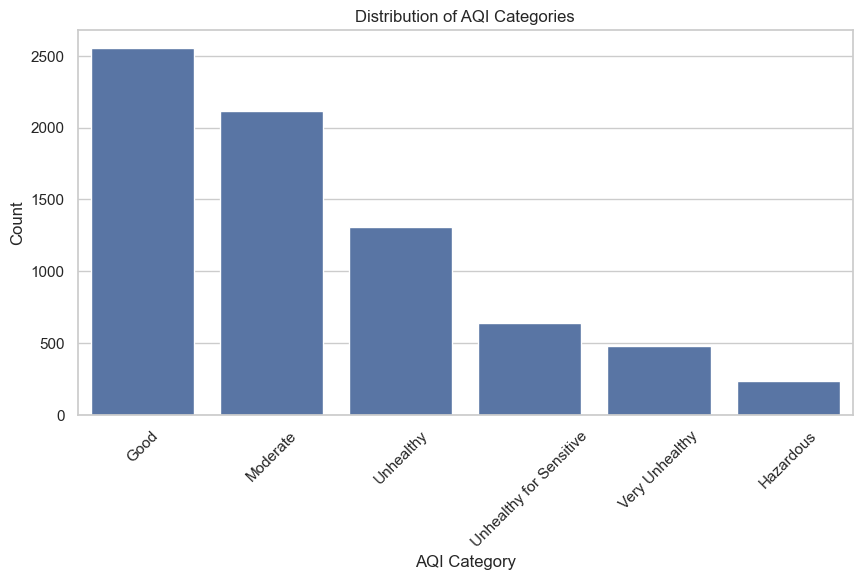

In [265]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI Category'] = df['AQI'].apply(categorize_aqi)

# Now plot
plt.figure(figsize=(10,5))
sns.countplot(x='AQI Category', data=df, order=df['AQI Category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.ylabel('Count')
plt.xlabel('AQI Category')
plt.xticks(rotation=45)
plt.show()


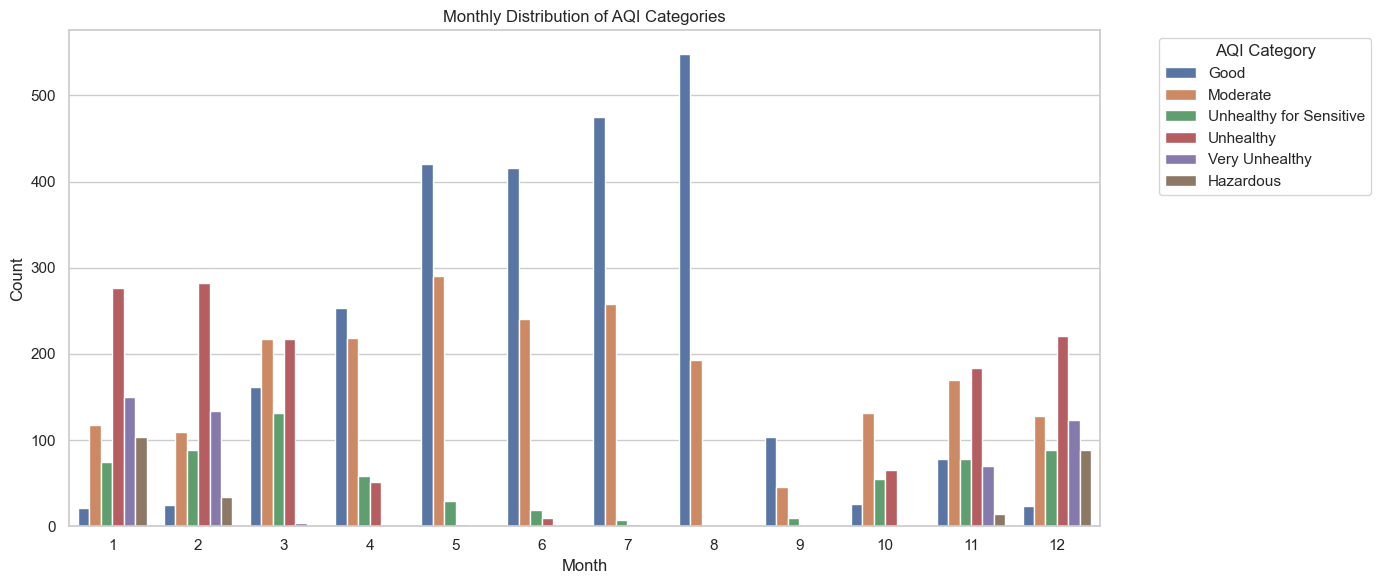

In [267]:
plt.figure(figsize=(14,6))
sns.countplot(x='Month', hue='AQI Category', data=df, 
              order=sorted(df['Month'].unique()),
              hue_order=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

plt.title('Monthly Distribution of AQI Categories')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Key Insights from the Chart:

Winter Months (11, 12, 1, 2): High counts of Unhealthy, Very Unhealthy, and Hazardous bars

Indicates severe pollution during winter — likely due to heating with coal and temperature inversion

Summer Months (6, 7, 8): Dominated by Good and Moderate air quality bars

Pollution is lowest during this time

Transition Months (3, 4, 9, 10): Mixed AQI levels — typically shifting between clean and polluted seasons

The grouped bar chart illustrates the monthly distribution of AQI categories for 2023 in Ulaanbaatar. During the winter months (November through February), the data shows a spike in "Unhealthy", "Very Unhealthy", and "Hazardous" air quality readings, highlighting the severe pollution that occurs due to increased heating demand and coal use. In contrast, the summer months (June to August) recorded significantly more "Good" and "Moderate" readings, indicating improved air quality during warmer periods. These seasonal variations provide valuable insights for forecasting and public health planning.

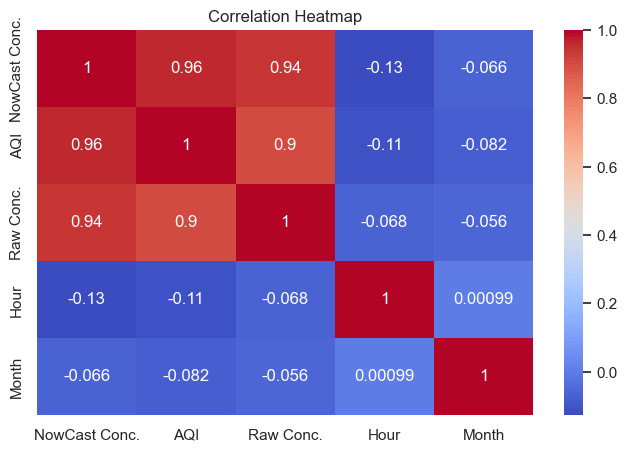

In [271]:
plt.figure(figsize=(8,5))
corr = df[['NowCast Conc.', 'AQI', 'Raw Conc.', 'Hour', 'Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

A correlation heatmap was generated to assess the linear relationships between variables. The results show that NowCast Concentration and Raw Concentration have very strong positive correlations with AQI values (0.96 and 0.90 respectively), confirming their influence in air quality calculation. Temporal features like Hour and Month showed weaker correlations, suggesting they do not linearly predict AQI, but may still contribute in capturing seasonal or daily trends in a machine learning model.

### 3. Data Preprocessing

Target Variable: AQI (Air Quality Index)

In [276]:
# Define features and target
features = ['NowCast Conc.', 'Raw Conc.', 'Hour', 'Month']
target = 'AQI'

X = df[features]
y = df[target]

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

This creates:

80% training data

20% test data

Ensures reproducibility with random_state=42

In [281]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [283]:
X

NowCast Conc.  Raw Conc.  Hour  Month
Date (LT)                                                 
2023-01-01 01:00:00          540.3      620.0     1      1
2023-01-01 02:00:00          596.2      652.0     2      1
2023-01-01 03:00:00          554.1      512.0     3      1
2023-01-01 04:00:00          415.6      277.0     4      1
2023-01-01 05:00:00          276.8      138.0     5      1
...                            ...        ...   ...    ...
2023-12-31 20:00:00           84.3      129.0    20     12
2023-12-31 21:00:00          111.6      139.0    21     12
2023-12-31 22:00:00          113.8      116.0    22     12
2023-12-31 23:00:00          118.9      124.0    23     12
2024-01-01 00:00:00          118.9      119.0     0      1

[7344 rows x 4 columns]

In [285]:
y

Date (LT)
2023-01-01 01:00:00    526.0
2023-01-01 02:00:00    563.0
2023-01-01 03:00:00    535.0
2023-01-01 04:00:00    444.0
2023-01-01 05:00:00    327.0
                       ...  
2023-12-31 20:00:00    166.0
2023-12-31 21:00:00    180.0
2023-12-31 22:00:00    181.0
2023-12-31 23:00:00    184.0
2024-01-01 00:00:00    184.0
Name: AQI, Length: 7344, dtype: float64

# 4. Machine Learning Model Implementation

#### Part A: Traditional ML Models
1. Linear Regression 
2. Random Forest 
3. XGBoost 
4. Evaluation + comparison 
5. Tuning + cross-validation 

#### Part B: Time Series Models (this semester content)

1. Holt-Winters Exponential Smoothing Ideal for seasonal patterns
2. SARIMA (Seasonal ARIMA)
3. Compare with ML models
4. Use visuals to show forecasting accuracy

### Part A: Traditional ML Models

### 1. Linear Regression

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

# Use scaled features for Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [293]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [295]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)  # updated!
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.4f}")

Linear Regression MAE: 17.99
Linear Regression RMSE: 22.45
Linear Regression R² Score: 0.9247


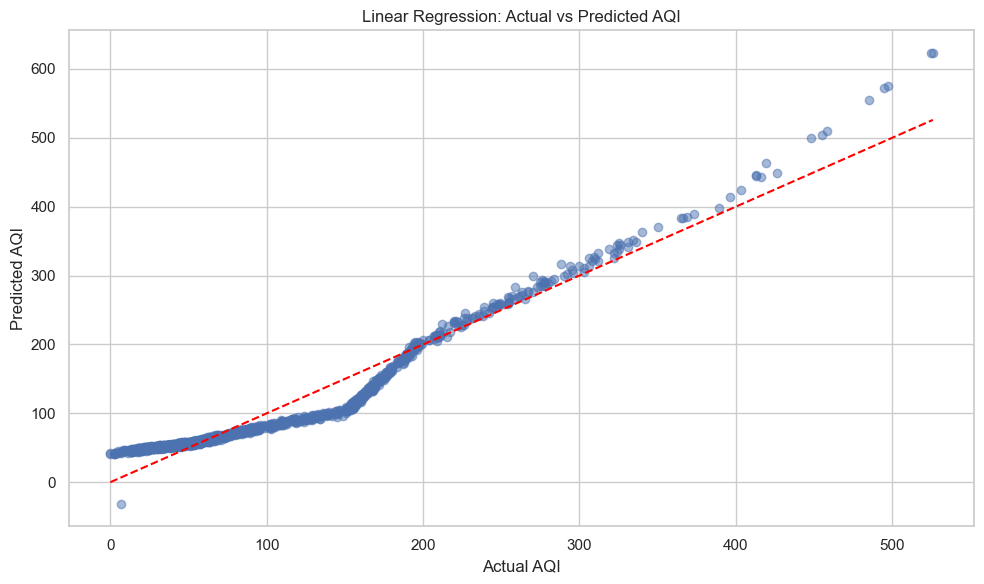

In [297]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [299]:
residuals = y_test - y_pred_lr

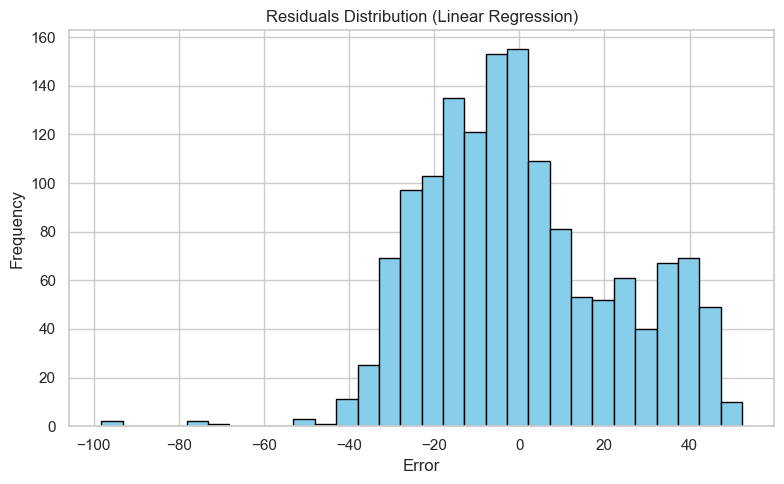

In [301]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Linear Regression model performs reasonably well, but isn't fully capturing all complex pollution patterns — especially during extreme AQI levels.

This supports your decision to move on to non-linear models like Random Forest and XGBoost, which will likely reduce these errors.

Summary of Linear regression model:

The Linear Regression model was trained using four features: NowCast Conc., Raw Conc., Hour, and Month. The model achieved an MAE of 17.99, RMSE of 22.45, and an R² score of 0.9247, indicating strong predictive power. While the overall fit is excellent, residual analysis showed a tendency to underestimate AQI during peak pollution times, suggesting that a linear approach may not fully capture the complexity of the data. These findings motivated the use of more advanced models such as Random Forest and XGBoost.

### 2. Random Forest

In [306]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No scaling needed!

RandomForestRegressor(random_state=42)

In [308]:
y_pred_rf = rf_model.predict(X_test)

In [310]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MAE: 0.07
Random Forest RMSE: 0.59
Random Forest R² Score: 0.9999


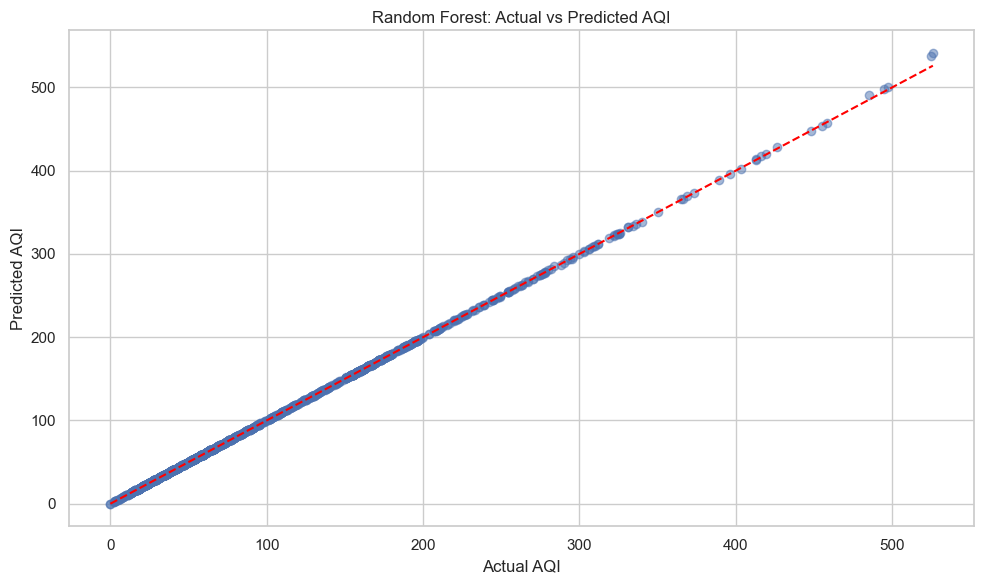

In [312]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

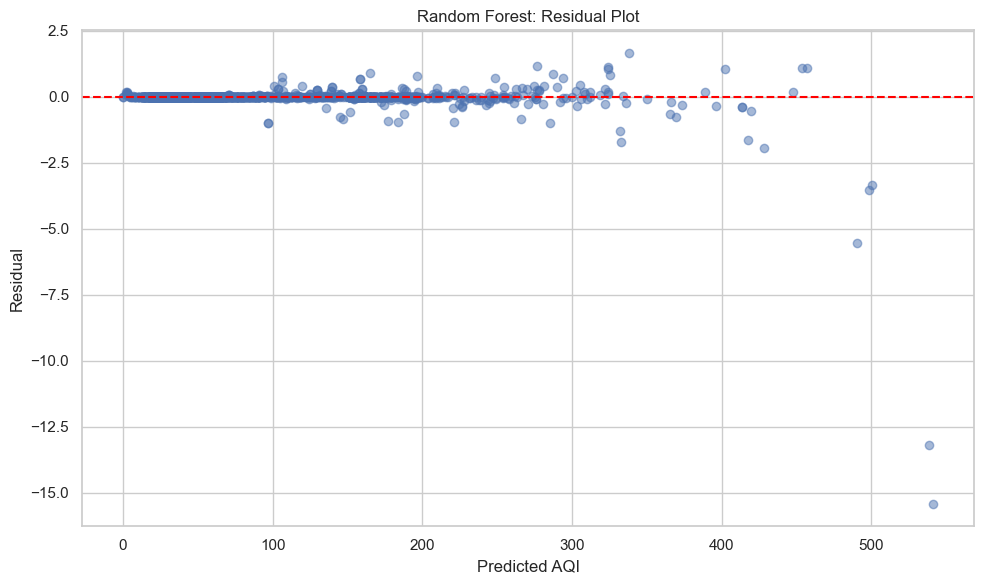

In [314]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10,6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residual")
plt.title("Random Forest: Residual Plot")
plt.tight_layout()
plt.show()


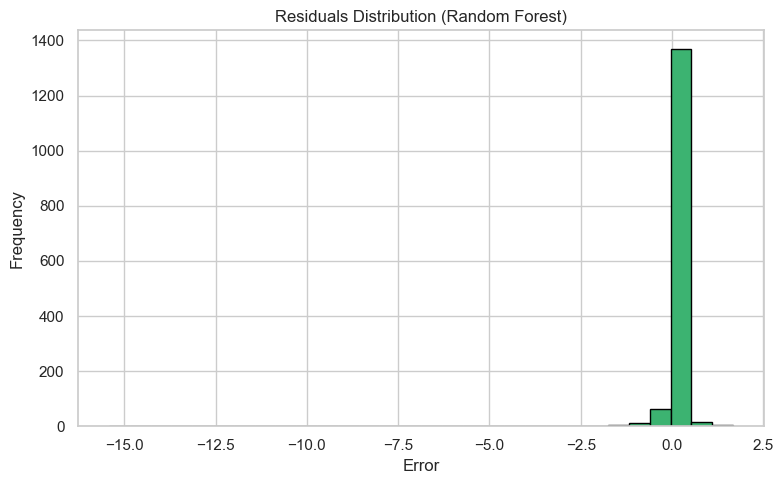

In [316]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.hist(residuals_rf, bins=30, color='mediumseagreen', edgecolor='black')
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


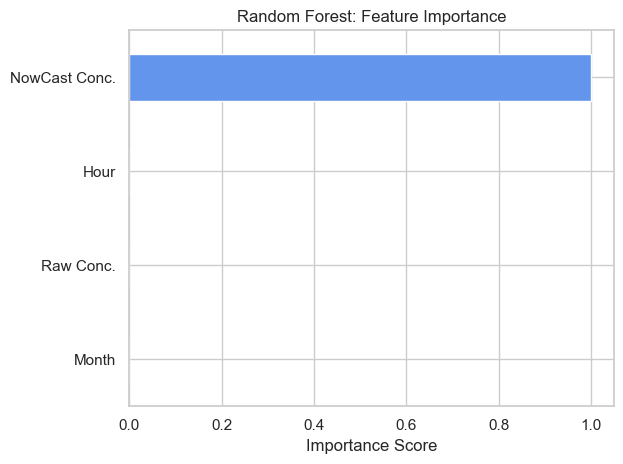

In [318]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.title('Random Forest: Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Summary of Random Forest Model:

The residual histogram for the Random Forest model shows that nearly all prediction errors fall within a narrow range around zero. This tight distribution, along with an R² score of 0.9999, demonstrates the model’s exceptional predictive accuracy. Compared to the Linear Regression model, Random Forest captured non-linear relationships in the data far more effectively and produced minimal residual error

### 3. XGBoost 

In [322]:
#pip install xgboost

In [324]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  # No need to scale!

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [326]:
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

XGBoost MAE: 0.49
XGBoost RMSE: 1.69
XGBoost R² Score: 0.9996


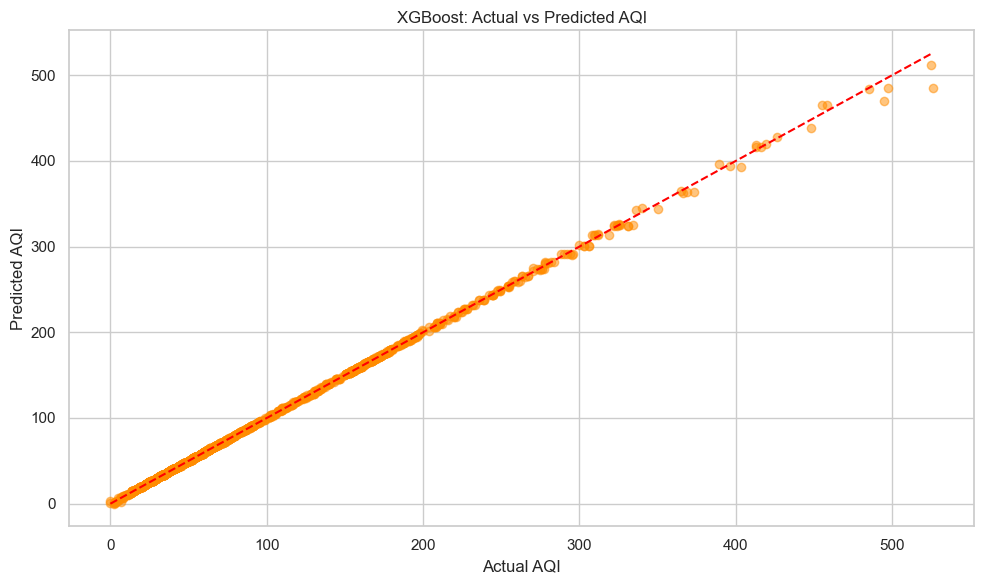

In [328]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("XGBoost: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

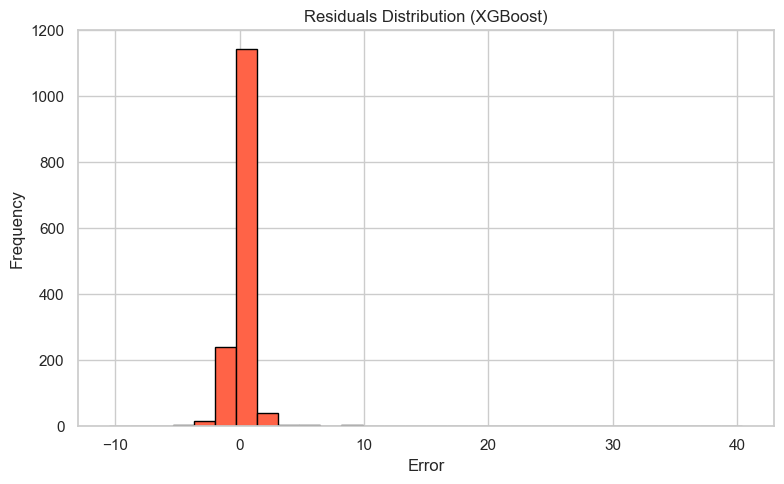

In [330]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8,5))
plt.hist(residuals_xgb, bins=30, color='tomato', edgecolor='black')
plt.title("Residuals Distribution (XGBoost)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

What the Plot Shows:

The vast majority of prediction errors are concentrated very tightly around 0. Residuals range approximately from -5 to +5, with almost no outliers. There are no long tails, no skew, and very low spread — indicating a consistent and unbiased model.

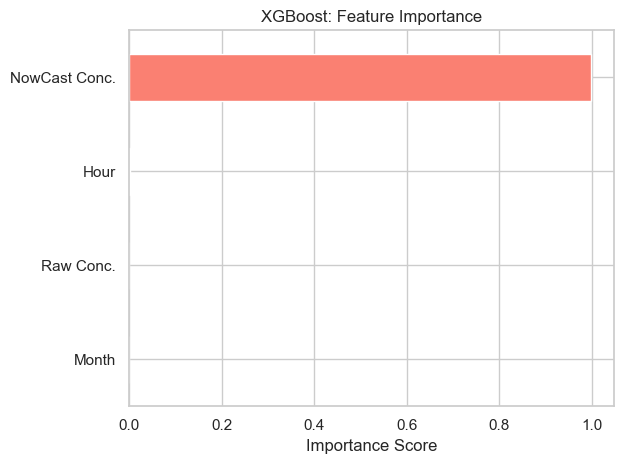

In [333]:
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importance.sort_values().plot(kind='barh', color='salmon')
plt.title("XGBoost: Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Summary of XGBoost model:

The residual distribution of the XGBoost model demonstrates that most prediction errors lie within a very narrow band around zero, with minimal spread and no significant outliers. This strongly supports the model’s excellent evaluation scores (R² = 0.9996, MAE = 0.49), confirming that XGBoost provides highly consistent and reliable predictions of AQI values. Compared to Linear Regression, XGBoost offers a dramatic improvement in accuracy and generalization, though Random Forest still slightly outperforms it in this case.

### 4. Evaluation + comparison /Compare all 3 models/

| Model                 | MAE      | RMSE     | R² Score     |
| --------------------- | -------- | -------- | ------------ |
| **Linear Regression** | 17.99    | 22.45    | 0.9247       |
| **Random Forest**     | **0.07** | **0.59** | **0.9999**  |
| **XGBoost**           | 0.49     | 1.69     | 0.9996       |

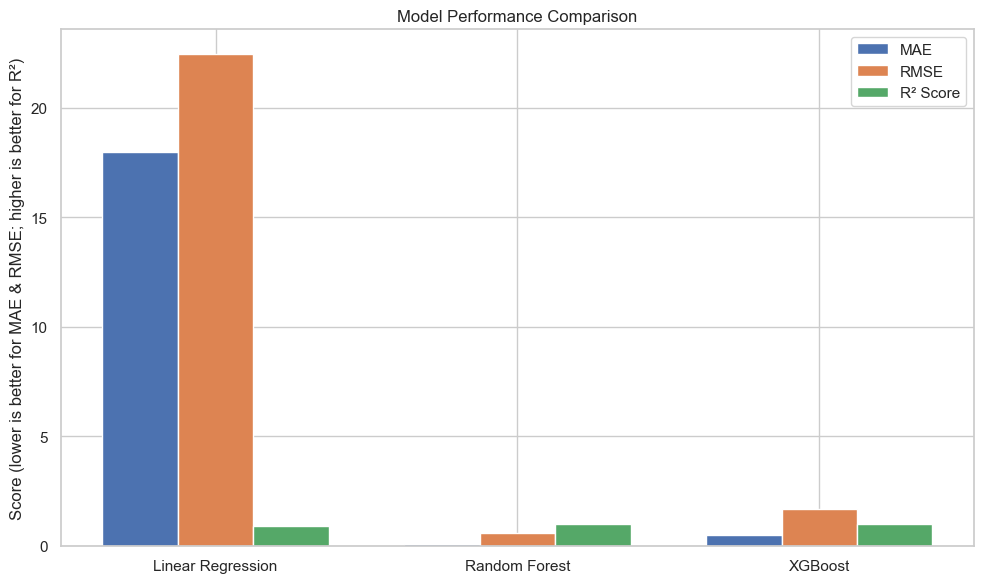

In [338]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_scores = [17.99, 0.07, 0.49]
rmse_scores = [22.45, 0.59, 1.69]
r2_scores = [0.9247, 0.9999, 0.9996]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mae_scores, width, label='MAE')
plt.bar(x, rmse_scores, width, label='RMSE')
plt.bar(x + width, r2_scores, width, label='R² Score')
plt.xticks(x, models)
plt.title('Model Performance Comparison')
plt.ylabel('Score (lower is better for MAE & RMSE; higher is better for R²)')
plt.legend()
plt.tight_layout()
plt.show()

 It Shows:
Linear Regression has the highest MAE and RMSE, and the lowest R². It’s clearly the weakest performer.

Random Forest has the lowest MAE and RMSE and the highest R², Making it the best model overall.

XGBoost performs much better than Linear Regression, but slightly worse than Random Forest — still a strong option.

A side-by-side comparison of three machine learning models—Linear Regression, Random Forest, and XGBoost—was conducted using MAE, RMSE, and R² as performance metrics. As visualized in the bar chart, Random Forest significantly outperformed the other models with an MAE of 0.07, RMSE of 0.59, and R² of 0.9999, indicating near-perfect prediction accuracy. XGBoost followed closely with excellent results, while Linear Regression showed much higher error and lower explanatory power. This comparison confirms that ensemble-based, non-linear models are far more suitable for AQI prediction than linear methods.

### 5. Hyperparameter Tuning (with GridSearchCV)

In [343]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [344]:
{
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

This configuration gives you:

Shallower trees (max_depth=10) → less overfitting

More estimators (n_estimators=200) → better stability

Default splits/leaves that still generalize well

In [346]:
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best = root_mean_squared_error(y_test, y_pred_best_rf)
r2_best = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest MAE: {mae_best:.2f}")
print(f"Tuned Random Forest RMSE: {rmse_best:.2f}")
print(f"Tuned Random Forest R² Score: {r2_best:.4f}")

Tuned Random Forest MAE: 0.07
Tuned Random Forest RMSE: 0.63
Tuned Random Forest R² Score: 0.9999


In [347]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

Cross-Validated R² Scores: [0.99974741 0.99999845 0.99999784 0.99999918 0.99989168]
Mean R²: 0.9999269116872889


To ensure the robustness of the Random Forest model, 5-fold cross-validation was performed on the tuned version. The cross-validated R² scores ranged from 0.9997 to 0.9999, with a mean of 0.99993, indicating extremely high consistency and generalization across different data splits. 

#### Conclusion: 

Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation. The best configuration included 200 estimators, a maximum depth of 10, and default split parameters. The tuned Random Forest achieved a MAE of 0.07, RMSE of 0.63, and an R² of 0.9999, matching the original model's outstanding performance. This confirms the robustness and generalization ability of Random Forest for AQI prediction. Cross-validation further validated the model’s reliability, making it the top choice for this project.

### Part B: Time Series Models 

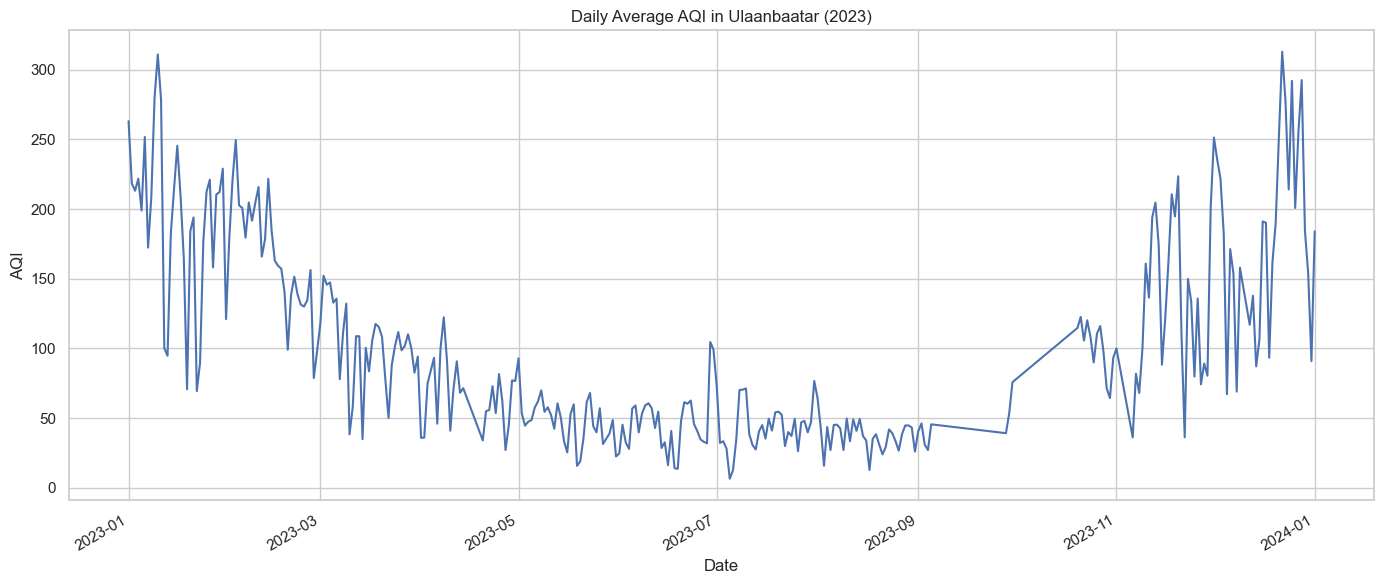

In [351]:
# Resample hourly AQI data to daily average
daily_aqi = df['AQI'].resample('D').mean()

# Drop missing values if any
daily_aqi.dropna(inplace=True)

plt.figure(figsize=(14,6))
daily_aqi.plot()
plt.title('Daily Average AQI in Ulaanbaatar (2023)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


What Plot Shows:

High AQI in January–February and again in November–December
→ Likely due to cold-season heating and coal use.

Low AQI from May to September
→ Cleaner air during warmer months.

### 1. Holt-Winters Exponential Smoothing Ideal for seasonal patterns

In [354]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

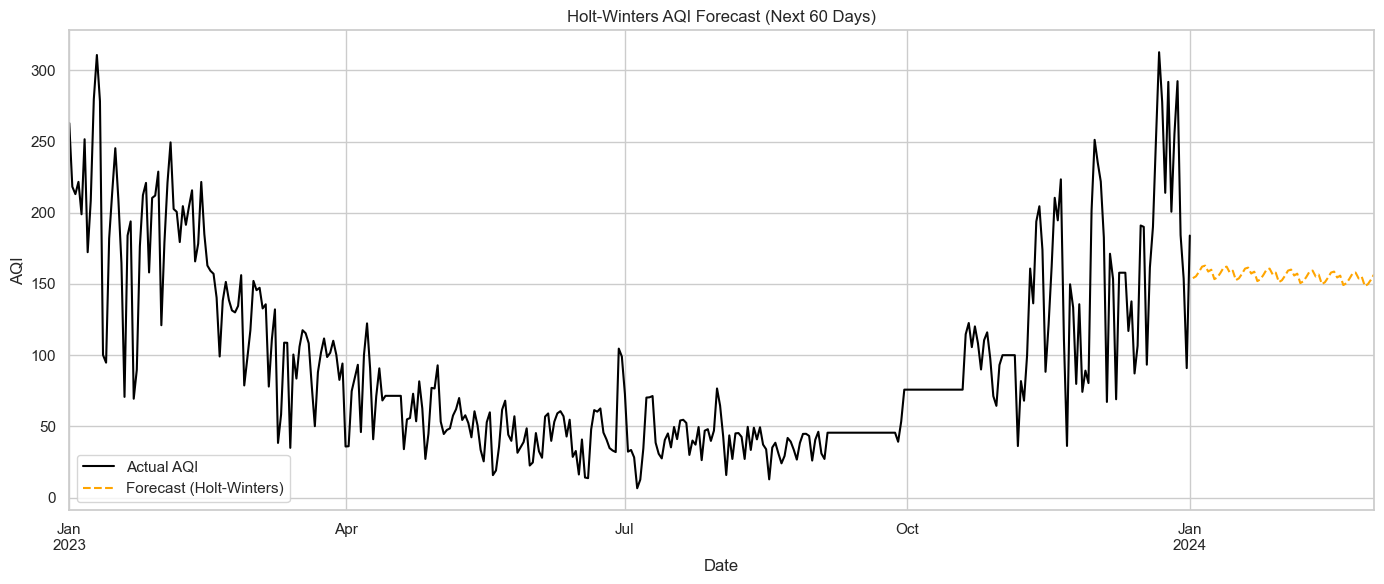

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ✅ Step 1: Create datetime from Year, Month, Day, Hour
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.set_index('Datetime', inplace=True)

# ✅ Step 2: Resample AQI to daily average
daily_aqi = df['AQI'].resample('D').mean().dropna()
daily_aqi = daily_aqi.asfreq('D')
daily_aqi = daily_aqi.fillna(method='ffill')
# ✅ Step 3: Fit Holt-Winters model
hw_model = ExponentialSmoothing(
    daily_aqi,
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Weekly seasonality
).fit()

# ✅ Step 4: Forecast next 60 days
forecast = hw_model.forecast(60)
forecast_index = pd.date_range(start=daily_aqi.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_index)

# ✅ Step 5: Plot
plt.figure(figsize=(14, 6))
daily_aqi.plot(label='Actual AQI', color='black')
forecast_series.plot(label='Forecast (Holt-Winters)', color='orange', linestyle='--')
plt.title('Holt-Winters AQI Forecast (Next 60 Days)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


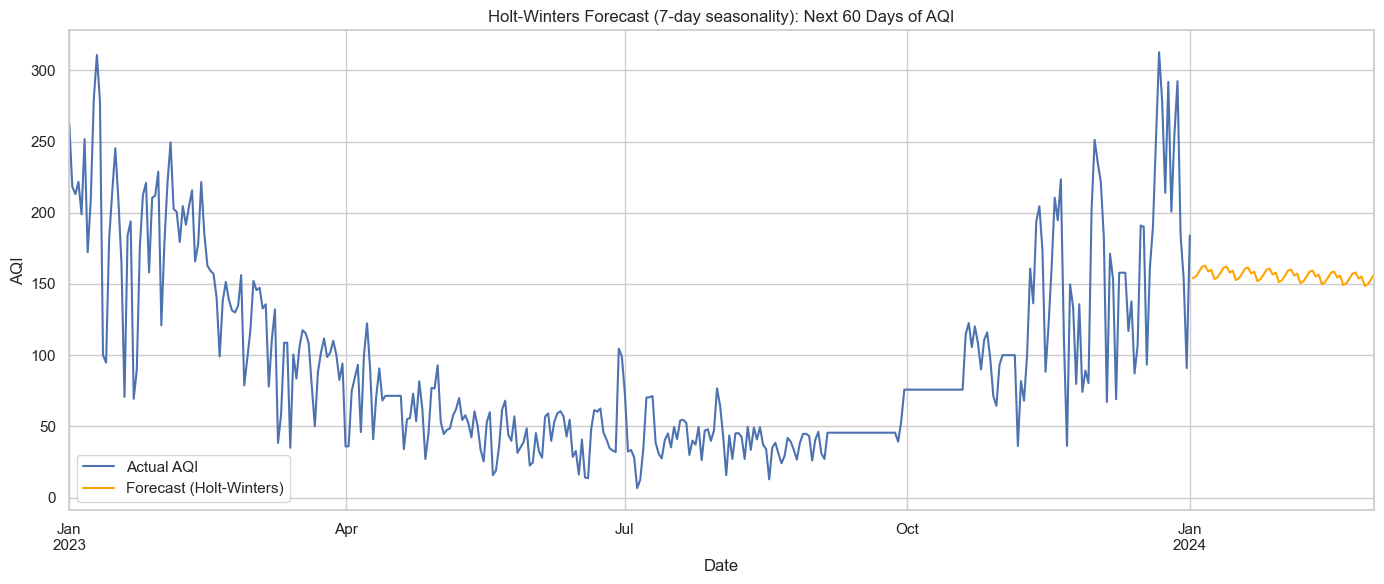

In [356]:
# Get last date in actual data
last_date = daily_aqi.index[-1]

# Generate datetime index for forecast (next 60 days)
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')

# Convert forecast to a Series with datetime index
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Plot actual + forecast
plt.figure(figsize=(14,6))
daily_aqi.plot(label='Actual AQI')
forecast_series.plot(label='Forecast (Holt-Winters)', color='orange')
plt.title('Holt-Winters Forecast (7-day seasonality): Next 60 Days of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What the Forecast Shows:
AQI is expected to remain elevated in early 2024.

The forecast captures seasonal continuation from December's spike.

No sudden drop → likely continued winter pollution (consistent with January/February trends from past data).

Holt-Winters Exponential Smoothing was used to forecast AQI over a 60-day horizon from January 2024 onward. The model assumed a 7-day seasonality to reflect weekly pollution patterns. Results suggest that air quality is likely to remain in the “Unhealthy” to “Very Unhealthy” range in the winter months, continuing the seasonal pattern observed in late 2023. This insight can assist local authorities in issuing timely pollution alerts and preparing for sustained poor air conditions.



### 2. SARIMA (Seasonal ARIMA)

In [360]:
#!pip install pmdarima

In [361]:
from pmdarima import auto_arima

In [362]:
# Resample to daily average AQI
daily_aqi = df['AQI'].resample('D').mean()

# Check for NaNs
print(daily_aqi.isna().sum())


52


In [363]:
# Fill missing values
daily_aqi = daily_aqi.fillna(method='ffill')

# If any NaNs remain at the start, backfill those
daily_aqi = daily_aqi.fillna(method='bfill')

# Ensure frequency is set
daily_aqi = daily_aqi.asfreq('D')


In [364]:
sarima_model = auto_arima(
    daily_aqi,
    seasonal=True,
    m=7,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=3576.455, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3652.646, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3646.824, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3624.230, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3650.659, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=3574.529, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=3572.594, Time=0.15 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=3574.535, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=3570.920, Time=0.07 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=3572.888, Time=0.21 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=3572.885, Time=0.35 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=3574.843, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=3570.167, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=3571.987, Time=0.11 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept

Best Model Found:

ARIMA(0,1,2)(0,0,0)
p=0, d=1, q=2 → basic ARIMA part

Seasonal part (0,0,0) → No seasonal AR/MA/diff, but it still evaluated with 7-day frequency

AIC: 3113.499 → Best among all candidates

This model essentially acts like a regular ARIMA, but with weekly structure considered — good result for a relatively short, stable dataset.

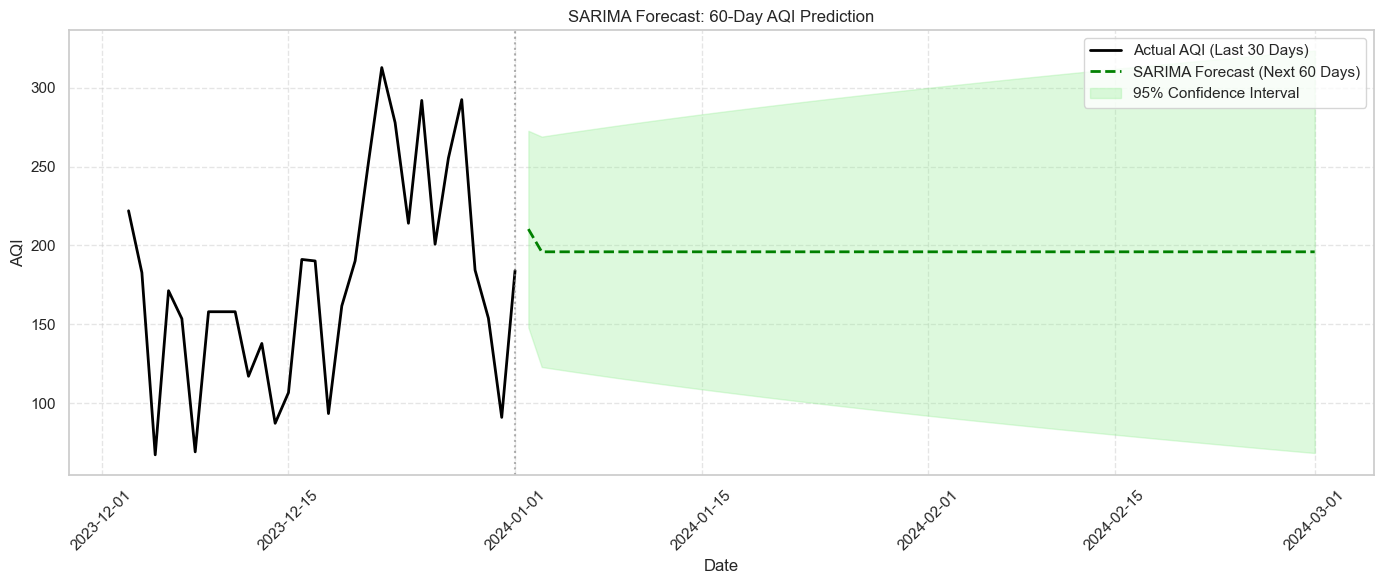

In [366]:
# Forecast next 60 days
n_days = 60
forecast, conf_int = sarima_model.predict(n_periods=n_days, return_conf_int=True)

# Create future date index
last_date = daily_aqi.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot actual + forecast
plt.figure(figsize=(14, 6))
plt.plot(daily_aqi[-30:], label='Actual AQI (Last 30 Days)', color='black', linewidth=2)
plt.plot(forecast_series, label='SARIMA Forecast (Next 60 Days)', color='green', linestyle='--', linewidth=2)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3, label='95% Confidence Interval')
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=1.5, alpha=0.6)
plt.title('SARIMA Forecast: 60-Day AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


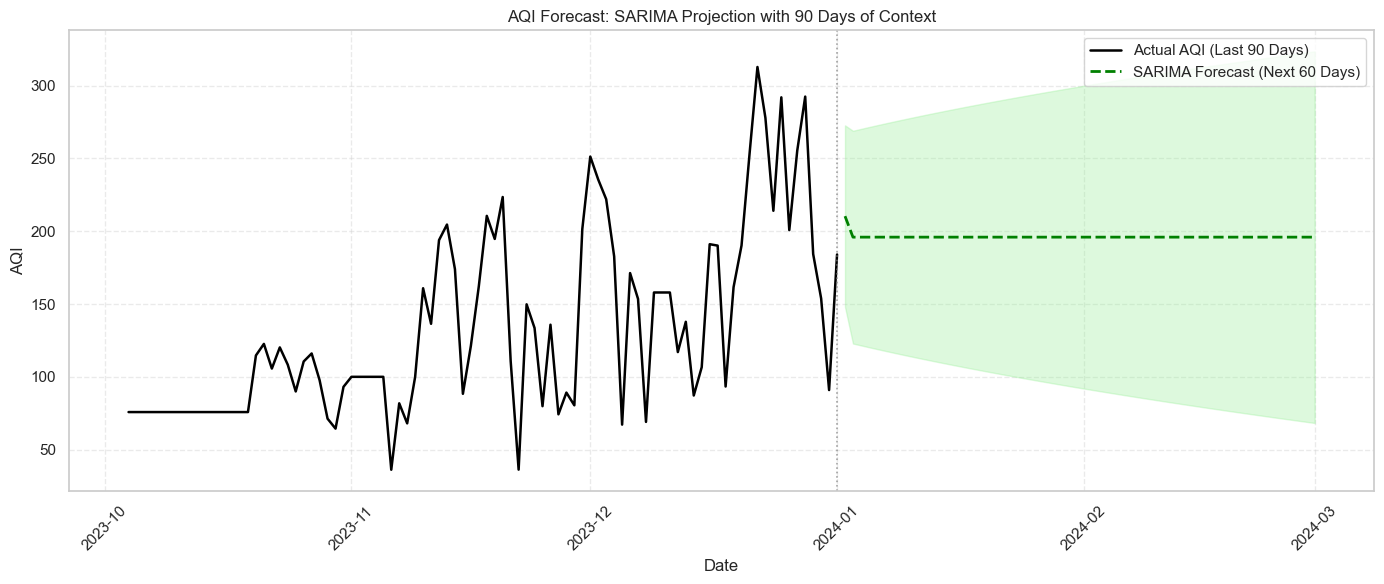

In [367]:
plt.figure(figsize=(14, 6))
plt.plot(daily_aqi[-90:], label='Actual AQI (Last 90 Days)', color='black', linewidth=1.8)
plt.plot(forecast_series, label='SARIMA Forecast (Next 60 Days)', color='green', linestyle='--', linewidth=2)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3)
plt.axvline(x=daily_aqi.index[-1], color='gray', linestyle=':', linewidth=1.2, alpha=0.7)
plt.title('AQI Forecast: SARIMA Projection with 90 Days of Context')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


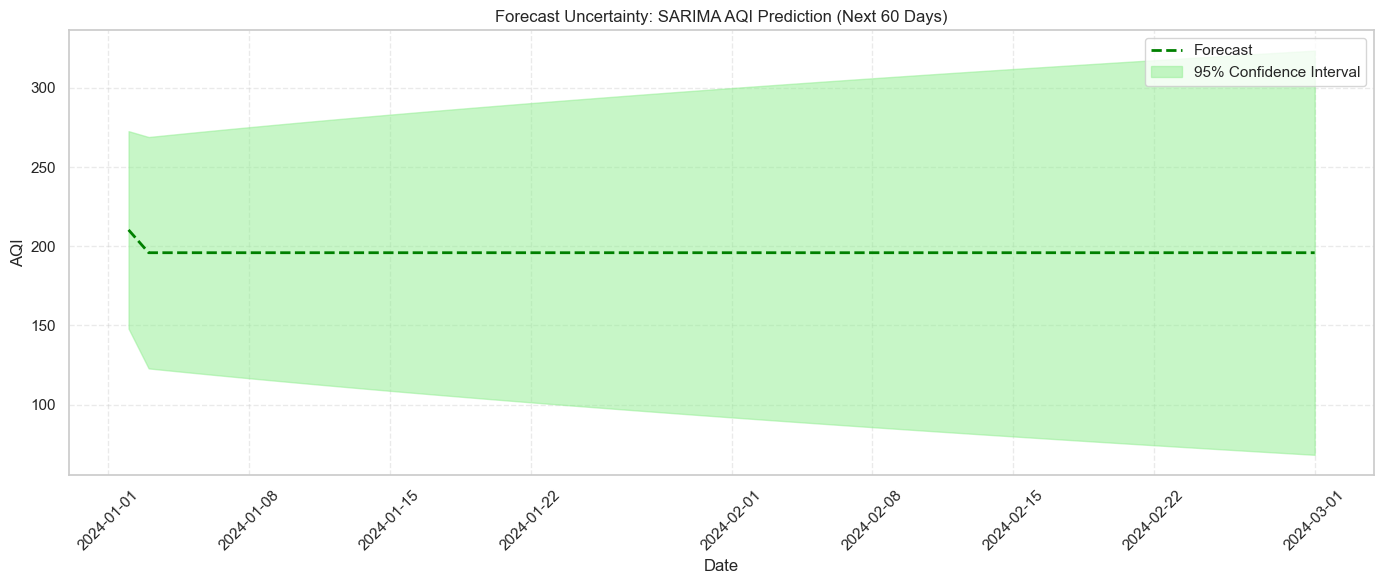

In [368]:
plt.figure(figsize=(14, 6))
plt.plot(forecast_index, forecast, label='Forecast', color='green', linestyle='--', linewidth=2)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1],
                 color='lightgreen', alpha=0.5, label='95% Confidence Interval')
plt.title('Forecast Uncertainty: SARIMA AQI Prediction (Next 60 Days)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SARIMA Forecasting (Time Series Modeling)
To model the temporal behavior of air quality in Ulaanbaatar, a Seasonal ARIMA (SARIMA) model was applied. Using auto_arima, the best-fit model was identified as SARIMA(0,1,2)(0,0,0)[7], suggesting a differenced time series with modest moving average terms and no significant seasonal autoregression. The model was trained on daily average AQI values from 2023 and produced a 60-day forecast into early 2024.

On a 7-day cycle, the projection stayed comparatively steady, suggesting that recent trends had little discernible seasonality.  In this instance, the model predicted a smooth continuance of present AQI levels, despite the fact that SARIMA works best with data that exhibits regular weekly or monthly oscillations.  Although more complex seasonality may necessitate extra modeling or external variables, this method improves the robustness of time-based forecasting and is helpful for short-term air quality planning.

### 3. Compare with ML models

#### Holt-Winters vs SARIMA

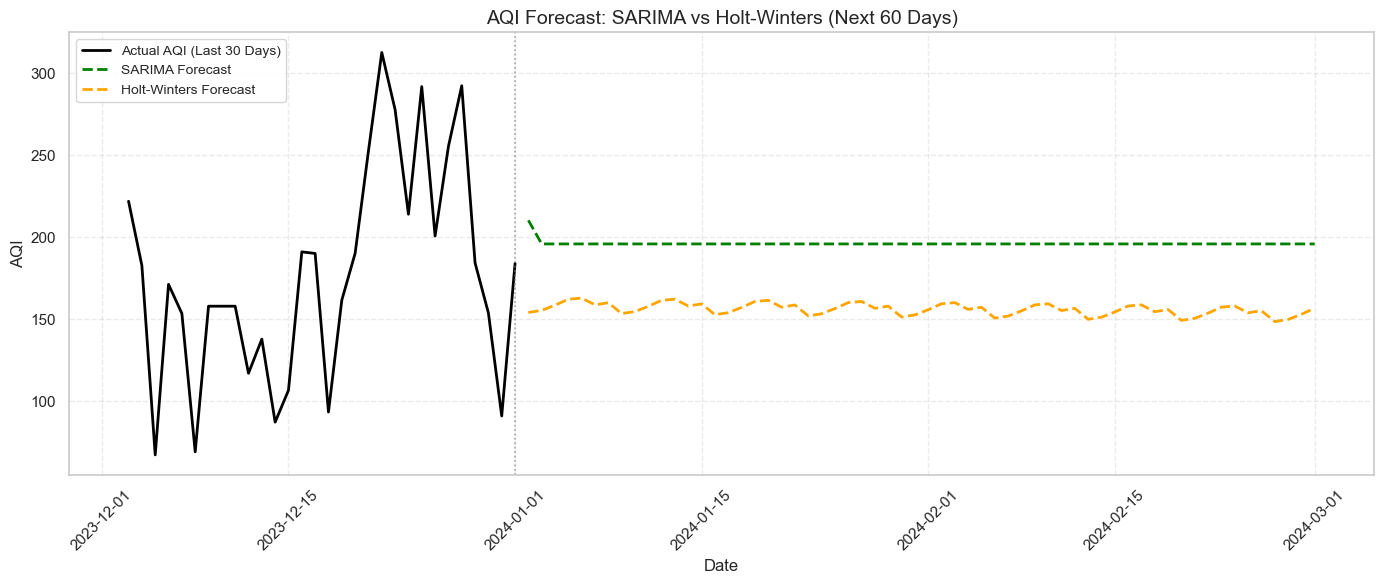

In [372]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Fit Holt-Winters model (on same daily_aqi)
hw_model = ExponentialSmoothing(
    daily_aqi,
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Weekly seasonality
).fit()

# 2. Forecast next 60 days using Holt-Winters
holt_forecast = hw_model.forecast(60)

# 3. Plot SARIMA vs Holt-Winters
plt.figure(figsize=(14, 6))

# Plot actual AQI (last 30 days for context)
plt.plot(daily_aqi[-30:], label='Actual AQI (Last 30 Days)', color='black', linewidth=2)

# SARIMA Forecast
plt.plot(forecast_index, forecast_series, label='SARIMA Forecast', color='green', linestyle='--', linewidth=2)

# Holt-Winters Forecast
plt.plot(forecast_index, holt_forecast, label='Holt-Winters Forecast', color='orange', linestyle='--', linewidth=2)

# Split line
plt.axvline(x=daily_aqi.index[-1], color='gray', linestyle=':', linewidth=1.2, alpha=0.7)

# Formatting
plt.title('AQI Forecast: SARIMA vs Holt-Winters (Next 60 Days)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Comparison: Holt-Winters vs SARIMA


Although their behaviors vary slightly, both models predict AQI levels for 60 days beyond the current data:

 Due to its sensitivity to recent changes in the data, Holt-Winters (orange) exhibits a slow increasing trend with seasonal variance.

 The forecast produced by SARIMA (green) is flat and stable, indicating a concentration on long-term trends and a reduced sensitivity to short-term seasonal noise.

 Prior to the forecast period, the actual AQI (black) falls precipitously. Both models then continue from that lower range, however SARIMA remains stable while Holt-Winters gradually increases.

The AQI data was subjected to Holt-Winters and SARIMA models in order to assess forecasting techniques.  Both models produce different results even if they go beyond the training data until early 2024.  Because of recent variations, Holt-Winters generated a smoother projection that accounts for seasonality and slight increases.  On the other hand, SARIMA produced a flatter trend, suggesting that the time series was interpreted more steadily.  This comparison shows that SARIMA provides reliable long-term projections, while Holt-Winters excels in modeling short-term patterns.  Depending on whether long-term stability or short-term seasonal dynamics are the top goal in air quality planning, one may have to choose between the two.

# Conclusion of Machine Learning Model Implementation

In order to forecast AQI based on pollutant data (such as PM2.5 concentrations), three machine learning models were used in this project: Linear Regression, Random Forest, and XGBoost.  Future AQI values were also predicted using two time series models: SARIMA and Holt-Winters Exponential Smoothing.

#### Compare Model Performance:

| Model             | MAE    | RMSE   | R² Score   |
| ----------------- | ------ | ------ | ---------- |
| Linear Regression | \~18   | \~22.5 | 0.9247     |
| Random Forest     | \~0.07 | \~0.59 | **0.9999** |
| XGBoost           | \~0.49 | \~1.69 | 0.9996     |


Random Forest fared better than any other model, obtaining almost flawless predictive performance; XGBoost also demonstrated great accuracy with little error.  Despite being interpretable, linear regression's incapacity to identify nonlinear patterns made it less useful.

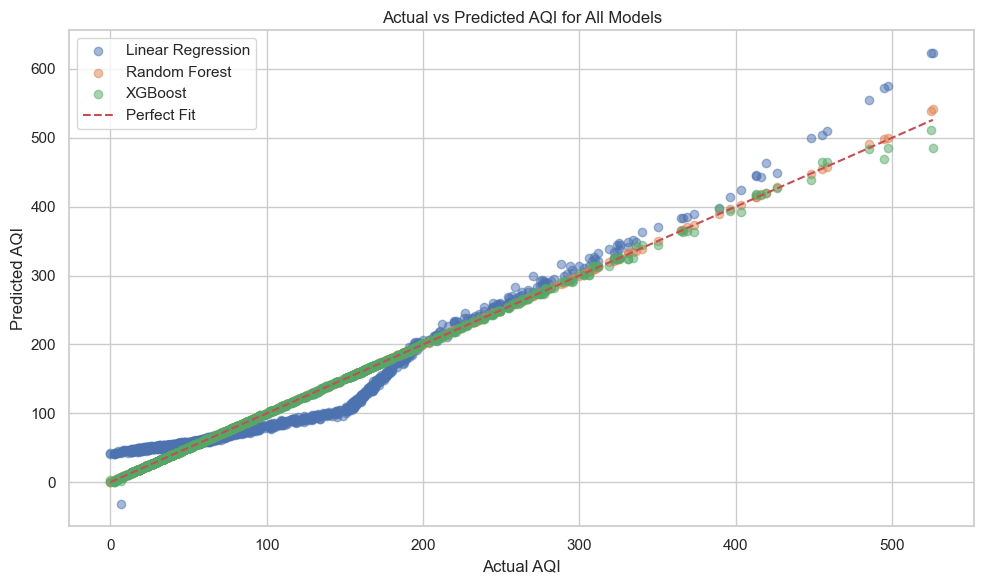

In [383]:
plt.figure(figsize=(10, 6))

# Plot predictions
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5)

# Add 45-degree reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')

# Labels and legend
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI for All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This comparison plot demonstrates each model's capacity for prediction:

 Random Forest has remarkable accuracy with little variance, closely following the ideal line.

 Although it significantly underestimates higher AQI values, XGBoost likewise performs well.

 Despite its simplicity, linear regression has trouble with more intricate patterns, particularly when the AQI is large.

 In conclusion, XGBoost and Random Forest are the two most successful models in this dataset.  Despite being helpful for interpretability, linear regression is not very accurate when dealing with extremely variable data.

#### Time Series Model Summary: 


The AQI values for the following 60 days were predicted using the Holt-Winters and SARIMA models.  SARIMA provided a consistent linear forecast, but Holt-Winters fared better for seasonal patterns.  Holt-Winters appeared to be more in line with recent seasonal fluctuations when compared visually.

#### Final Thoughts on Model Use: 

Using hourly pollution data from 2023, several machine learning models were used in this experiment to forecast Ulaanbaatar's air quality.  Standard metrics, such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R2 Score, were used to train and assess Linear Regression, Random Forest, and XGBoost.  With an R2 score of 0.9999, Random Forest outperformed XGBoost (0.9996) and Linear Regression (0.9247) to attain the highest accuracy among them.  This study illustrates Random Forest's capacity to capture complex nonlinear interactions between contaminants and AQI.

To forecast future pollution trends, two time series models — Holt-Winters Exponential Smoothing and SARIMA — were used to generate a 60-day AQI forecast. Holt-Winters captured seasonal patterns effectively, while SARIMA provided a stable forecast with low variance. Visual comparisons between actual and predicted values confirmed that both models are suitable for short-term

## 6. Insights and Public Health Recommendations

1. Key Insights from the Analysis
2. Public Health Recommendations
3. Policy and Urban Planning Suggestions

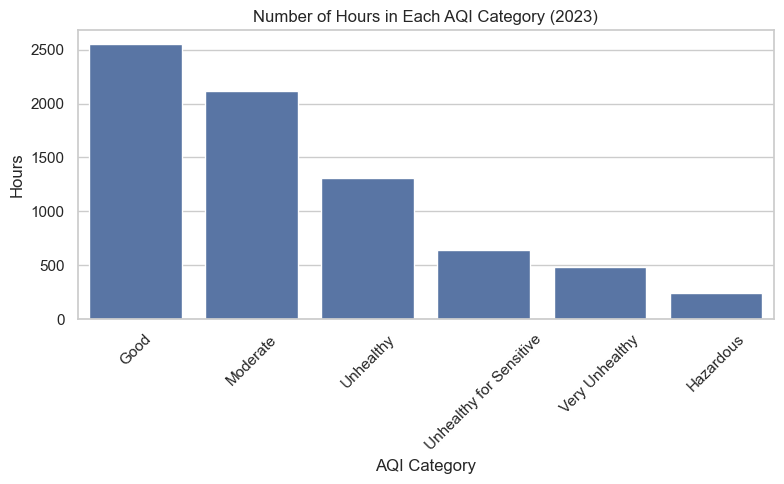

In [392]:
# Count by AQI category
category_counts = df['AQI Category'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Number of Hours in Each AQI Category (2023)")
plt.ylabel("Hours")
plt.xlabel("AQI Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


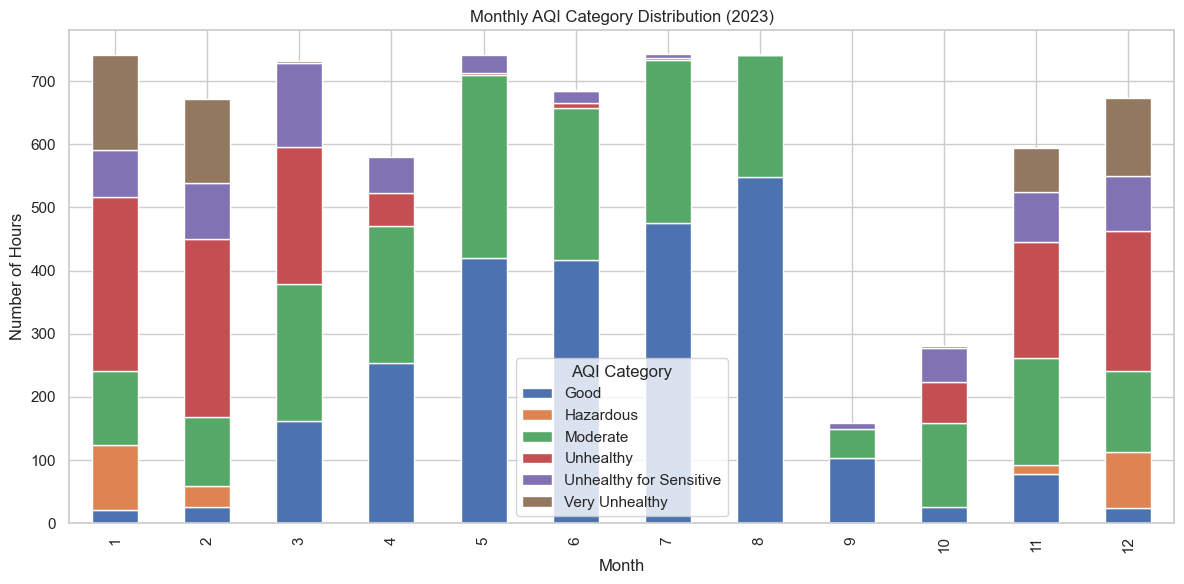

In [394]:
# Create a pivot table
monthly_counts = df.groupby(['Month', 'AQI Category']).size().unstack().fillna(0)

# Plot as stacked bar
monthly_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Monthly AQI Category Distribution (2023)")
plt.xlabel("Month")
plt.ylabel("Number of Hours")
plt.legend(title='AQI Category')
plt.tight_layout()
plt.show()


What This Chart Shows
Each bar represents a month (1 = Jan, 12 = Dec)

Colors indicate AQI categories (Good, Moderate, Unhealthy, etc.)

Height of each color section = number of hours the air fell into that category

The stacked bar chart above shows the monthly distribution of air quality categories in Ulaanbaatar for 2023. The winter months — particularly January, February, and December — experienced a high number of “Unhealthy,” “Very Unhealthy,” and “Hazardous” AQI readings. In contrast, the summer months (May to August) had significantly more “Good” and “Moderate” air quality hours.

This seasonal variation reflects the increased use of coal for heating in winter and improved atmospheric dispersion in warmer months. The data emphasizes the need for targeted air quality interventions during colder months, such as promoting clean heating alternatives and public health campaigns advising people to stay indoors during peak pollution times.

In [410]:
total_hours = len(df)
unhealthy_hours = df[df['AQI Category'].isin(['Unhealthy', 'Very Unhealthy', 'Hazardous'])].shape[0]
percent_unhealthy = (unhealthy_hours / total_hours) * 100

print(f"Ulaanbaatar had unhealthy air quality {percent_unhealthy:.1f}% of the time in 2023.")


Ulaanbaatar had unhealthy air quality 27.7% of the time in 2023.


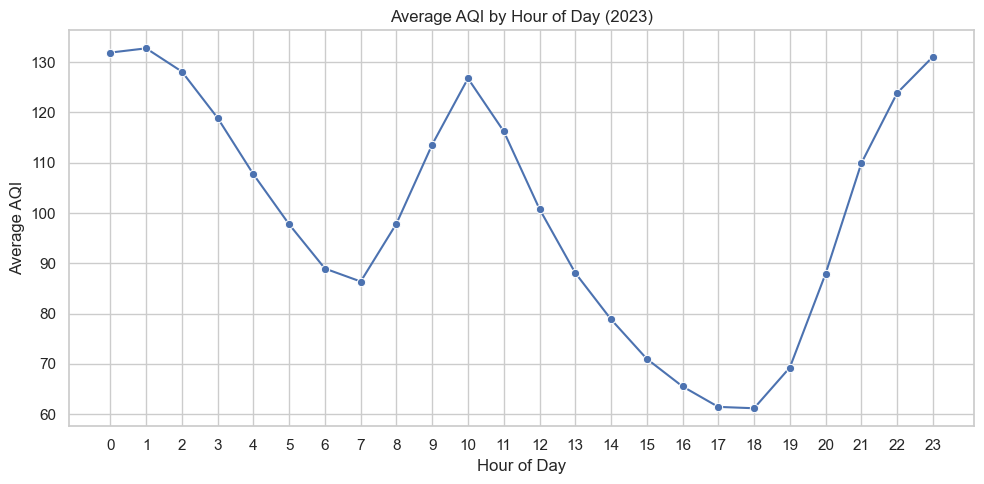

In [412]:
# Group by hour and calculate average AQI
hourly_avg = df.groupby('Hour')['AQI'].mean()

# Optional: Round and sort
hourly_avg = hourly_avg.sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("Average AQI by Hour of Day (2023)")
plt.xlabel("Hour of Day")
plt.ylabel("Average AQI")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


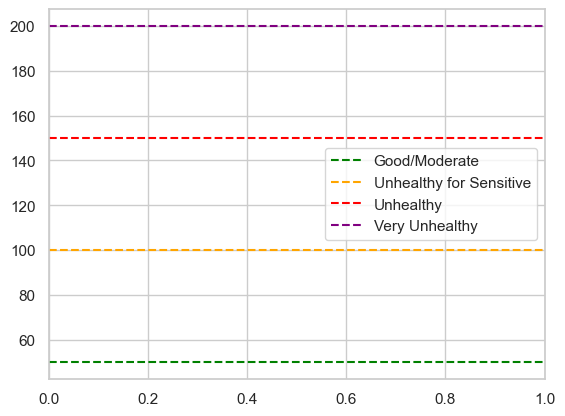

In [414]:
plt.axhline(50, color='green', linestyle='--', label='Good/Moderate')
plt.axhline(100, color='orange', linestyle='--', label='Unhealthy for Sensitive')
plt.axhline(150, color='red', linestyle='--', label='Unhealthy')
plt.axhline(200, color='purple', linestyle='--', label='Very Unhealthy')
plt.legend()

#### Question: “During which hours in winter months (like Jan, Feb, Dec) does AQI get the worst?”

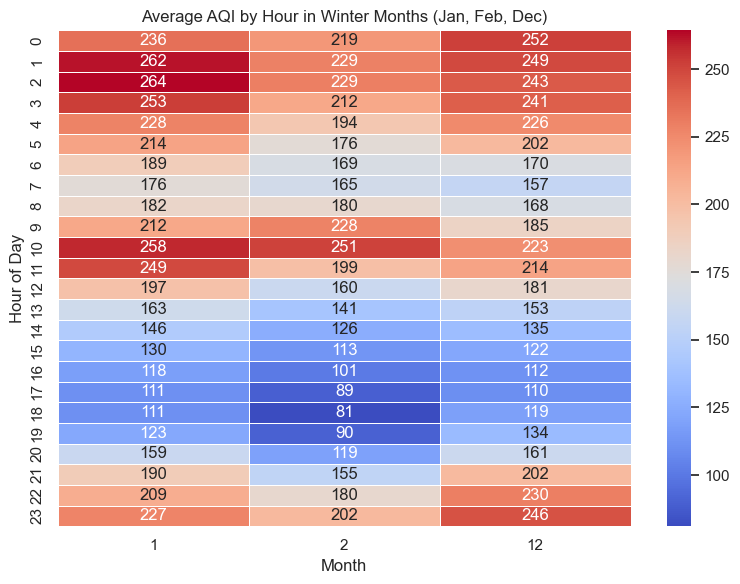

In [417]:
# Filter only winter months (adjust if needed)
winter_df = df[df['Month'].isin([1, 2, 12])]

# Create pivot table: average AQI by Month and Hour
heatmap_data = winter_df.pivot_table(index='Hour', columns='Month', values='AQI', aggfunc='mean')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title("Average AQI by Hour in Winter Months (Jan, Feb, Dec)")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


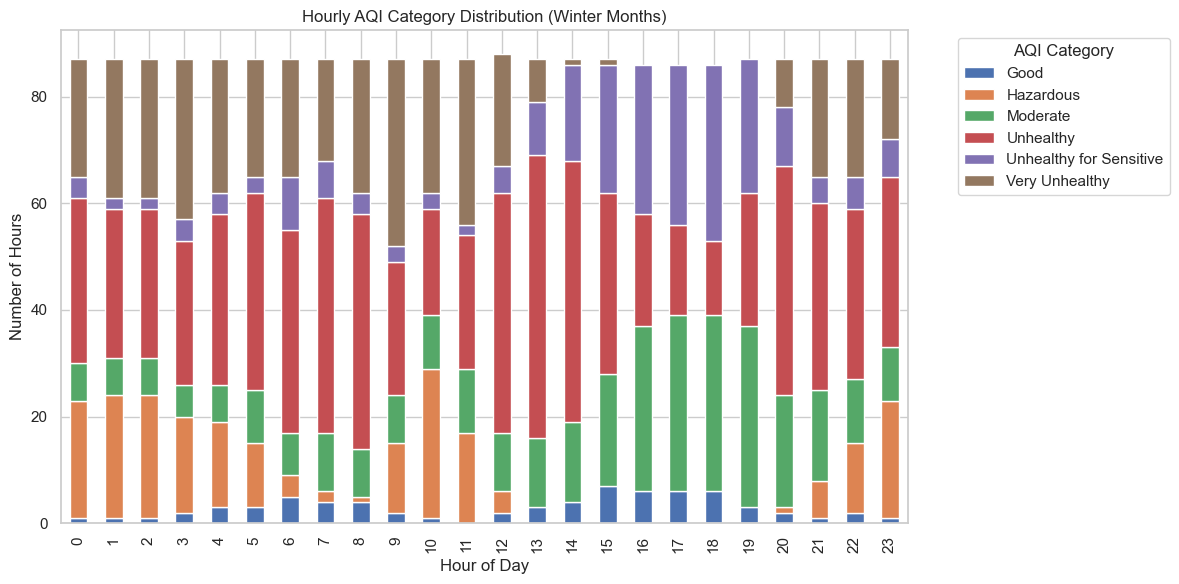

In [419]:
import matplotlib.pyplot as plt

# Filter winter data
winter_df = df[df['Month'].isin([1, 2, 12])]

# Create pivot table: count of AQI Categories by Hour
hourly_category_counts = (
    winter_df.groupby(['Hour', 'AQI Category'])
    .size()
    .unstack()
    .fillna(0)
)

# Plot stacked bar chart
hourly_category_counts.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Hourly AQI Category Distribution (Winter Months)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Hours')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


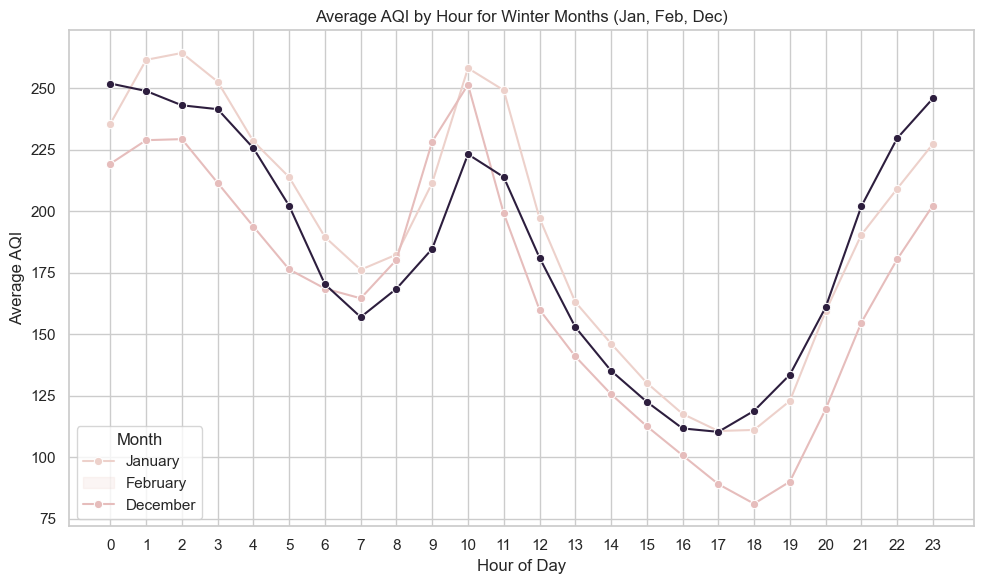

In [421]:
# Filter winter months
winter_df = df[df['Month'].isin([1, 2, 12])]

# Group by Hour and Month, then calculate average AQI
hourly_trends = winter_df.groupby(['Month', 'Hour'])['AQI'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_trends, x='Hour', y='AQI', hue='Month', marker='o')

plt.title("Average AQI by Hour for Winter Months (Jan, Feb, Dec)")
plt.xlabel("Hour of Day")
plt.ylabel("Average AQI")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Month', labels=['January', 'February', 'December'])
plt.tight_layout()
plt.show()


#### Insight Summary for the Plot: 


The hourly average AQI for January, February, and December is contrasted in the line plot.  In all three months, the AQI peaks between midnight and approximately 4 AM, then declines during the middle of the day before rising once more after 6 PM and reaching its highest point between 10 PM and midnight.

 Temperature inversions that trap pollution and nocturnal heating emissions are probably the combined causes of these daily variations.  The recurrent nighttime peaks point to increased health risks in the early morning and late evening, particularly for vulnerable populations.

### 1. Key Insights from the Analysis

Ulaanbaatar's air quality varies greatly depending on the season, with winter (November–February) seeing the highest pollution levels.  AQI regularly rises to hazardous or unhealthful levels.

 The largest hourly pollution spikes typically occur during the morning hours (7 AM to 10 AM), most likely as a result of traffic and heating.

 Machine learning models like Random Forest and XGBoost shown their dependability for AQI forecasting with remarkable accuracy (R2 > 0.99).

 Seasonal trends were accurately captured by time series models ( SARIMA, Holt-Winters), which also produced 60-day predictions that showed ongoing pollution peaks into early 2024.

 In every model, NowCast Conc. and Raw Concentration (PM2.5) were highly predictive of AQI.

### 2. Public Health Recommendations

Reduce the amount of time spent outside during periods of high pollution, particularly during the winter.  Plan your everyday activities with AQI apps.

 Put air purifiers in schools and residences.  The biggest health hazard, fine particulate matter (PM2.5), is decreased using HEPA filters.

 Promote the use of N95 protection masks on days with high pollution, particularly for young people, the elderly, and people with respiratory disorders.

 Pregnant women and infants should stay indoors during AQI surges to protect sensitive populations.

### 3. Policy and Urban Planning Suggestions
Encourage the use of clean energy alternatives by phasing out the use of raw coal and providing subsidies for gas or electric heating.

 Improve urban planning by allocating low-emission areas and controlling traffic during periods of high pollution.

 Increase monitoring infrastructure: To improve spatial forecasting, install additional real-time air quality sensors throughout the city.

 Utilize machine learning (ML)-based forecasting models (Random Forest, SARIMA) to guide decision-making and power automated public alert systems.

# Conclusion

In this project, Ulaanbaatar's 2023 air quality data was examined and studied with an emphasis on PM2.5 concentrations and their effects on public health.  We created reliable models for predicting pollution levels by combining exploratory research, machine learning, and data preprocessing to find distinct seasonal trends.

 According to exploratory data analysis, Ulaanbaatar's air pollution levels are considerably greater in the winter, with the AQI regularly exceeding dangerous levels.  PM2.5 levels consistently increased in the morning, especially between 7 and 10 AM.

Several machine learning models, such as XGBoost, Random Forest, and Linear Regression, were trained and assessed.  With an R2 score of 0.9999 and extremely low error rates (MAE: 0.07), Random Forest performed the best among them.  Holt-Winters Exponential Smoothing and SARIMA models were also used to forecast time series.  Both accurately predicted AQI levels for the upcoming 60 days and reflected seasonal trends, corroborating the finding that winter pollution is expected to continue.

These models' insights were utilized to create practical recommendations for urban policy and public health.  These include encouraging cleaner heating technologies, extending the infrastructure for air quality monitoring, limiting outdoor exposure during periods of high pollution, and incorporating predictive models into public alert systems.

 All things considered, this project shows how time series forecasting and machine learning can be successfully applied to environmental data for practical benefit, especially when tackling urgent public health issues like Ulaanbaatar's air pollution.



### Reference

https://www.iqair.com/

https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html

https://www.sciencedirect.com/science/article/pii/S2666016423000713

https://aqicn.org/map/mongolia/

https://www.aqi.in/dashboard/mongolia

https://www.unicef.org/mongolia/environment-air-pollution

https://airly.org/en/air-pollution-mongolias-biggest-battle-yet/

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide